In [15]:
import tensorflow as tf
print(tf.version.VERSION)
print("Dispositivos disponibles:", tf.config.list_physical_devices('GPU'))


2.19.0
Dispositivos disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Importar dataset MNIST digits

In [6]:
digits_mnist = tf.keras.datasets.mnist
(train_img, train_labels), (test_img, test_labels) = digits_mnist.load_data()

# Hacemos un reshape para indicar a la CNN que tiene un canal de color (gris).
# shape[0] es la cantidad de imágenes
train_img = train_img.reshape(train_img.shape[0], 28, 28, 1)
test_img = test_img.reshape(test_img.shape[0], 28, 28, 1)
train_img.shape, test_img.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# split the training data in train and validation subset
from sklearn.model_selection import train_test_split
train_img, validation_img, train_labels, validation_labels = train_test_split(train_img,
                                                                              train_labels,
                                                                              test_size=0.2,
                                                                              random_state=1234)
print(f"Imágenes de entrenamiento : {train_img.shape}")
print(f"Imágenes de validación : {validation_img.shape}")
print(f"Imágenes de test : {test_img.shape}")

Imágenes de entrenamiento : (48000, 28, 28, 1)
Imágenes de validación : (12000, 28, 28, 1)
Imágenes de test : (10000, 28, 28, 1)


Normalizamos los datos (valores entre 0 y 1) para mejorar convergencia del modelo

In [8]:
train_img  = train_img / 255.0
validation_img  = validation_img / 255.0
test_img = test_img / 255.0

Imprimimos las 10 primeras imágenes

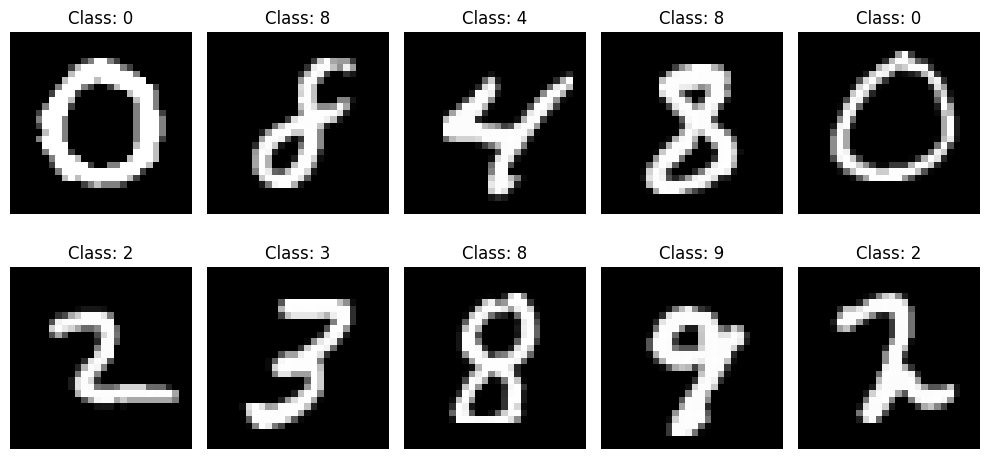

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,12))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(train_img[i], cmap="gray")
    plt.title(f"Class: {train_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Modelo CNN

In [37]:
# Limpiamos sesión (liberamos memoria)
# Ejecuta para los subsiguientes entrenamientos después de ajustar algún parámetro
tf.keras.backend.clear_session()

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(0.4),
    Dense(units=10, activation='softmax')
])

In [53]:
#Compilación del modelo

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       123,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,562 (506.10 KB)

 Trainable params: 129,562 (506.10 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del modelo

In [54]:
history = model.fit(train_img, train_labels, epochs=15, validation_data=(validation_img, validation_labels))


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8455 - loss: 0.4890 - val_accuracy: 0.9739 - val_loss: 0.0853
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9683 - loss: 0.1082 - val_accuracy: 0.9831 - val_loss: 0.0515
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9789 - loss: 0.0742 - val_accuracy: 0.9857 - val_loss: 0.0437
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0581 - val_accuracy: 0.9873 - val_loss: 0.0401
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9864 - loss: 0.0487 - val_accuracy: 0.9882 - val_loss: 0.0360
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9868 - loss: 0.0433 - val_accuracy: 0.9851 - val_loss: 0.0488
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9891 - loss: 0.0347 - val_accuracy: 0.9885 - val_loss: 0.0376
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0303 - 

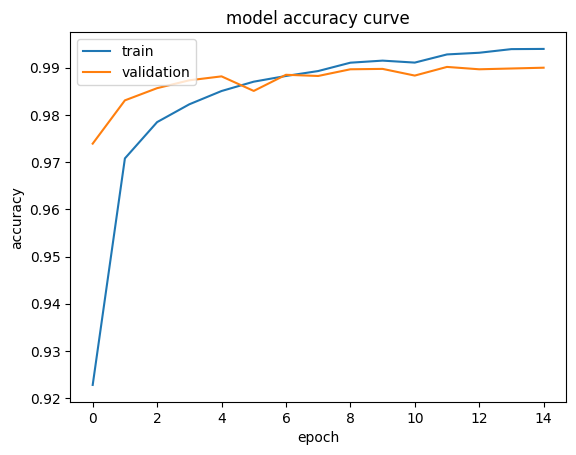

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

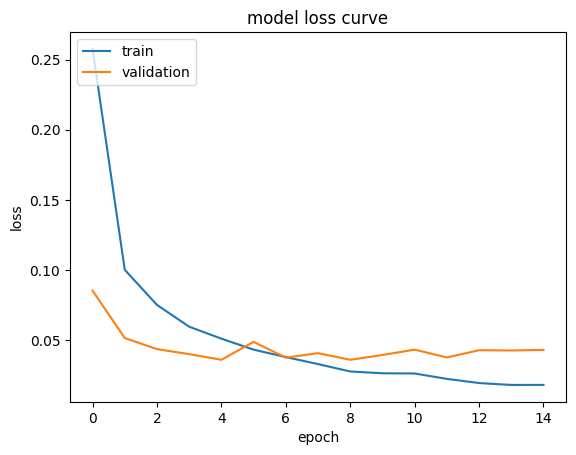

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


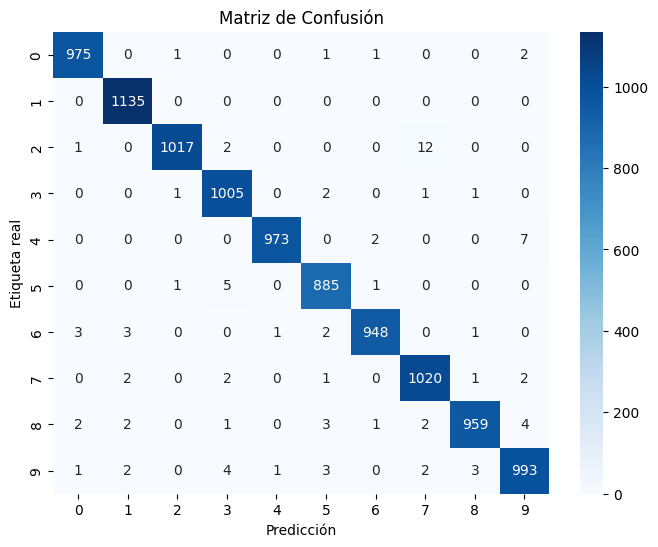

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

pred = model.predict(test_img)

pred_labels = np.argmax(pred, axis=1)  # Seleccionar la clase con mayor probabilidad
true = test_labels

cm = confusion_matrix(true, pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusión')
plt.show()

print(classification_report(true, pred_labels))

Número total de imágenes mal clasificadas: 90


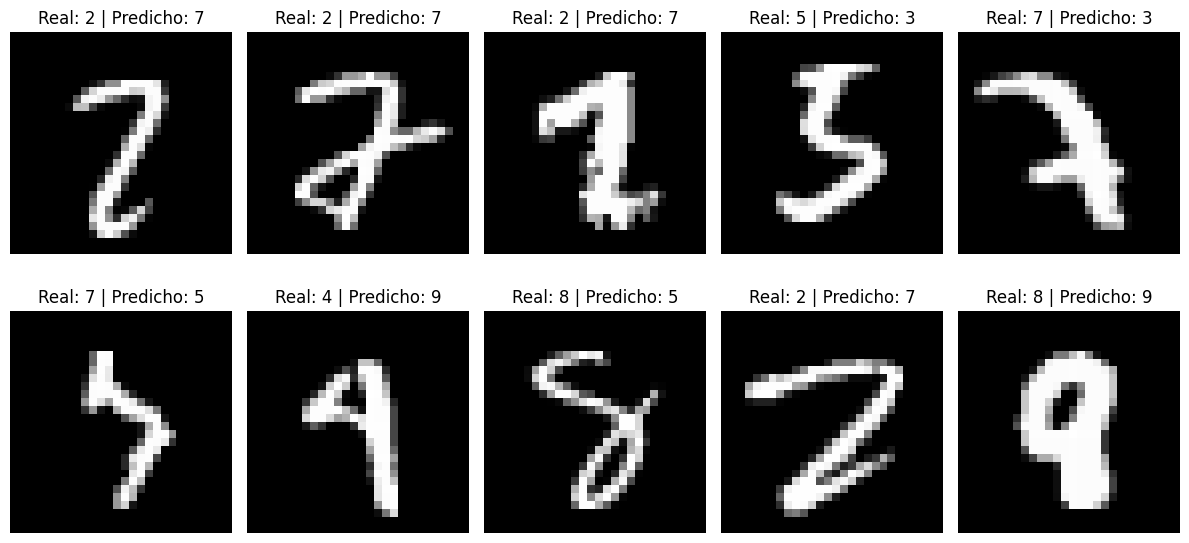

In [58]:
# Identificar los índices de las imágenes que se han clasificado incorrectamente
incorrect_indices = np.where(pred_labels != test_labels)[0]

print("Número total de imágenes mal clasificadas:", len(incorrect_indices))

num_show=10

plt.figure(figsize=(12, 6))
for i, index in enumerate(incorrect_indices[:num_show]):
    plt.subplot(2, (num_show + 1) // 2, i + 1)
    plt.imshow(test_img[index], cmap='gray')
    plt.title(f"Real: {test_labels[index]} | Predicho: {pred_labels[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()